<a href="https://colab.research.google.com/github/lmpereirao01/Primer-Repositorio/blob/main/Introduccion_Python_Pandas_Cafeteria_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Python y Pandas
### Notebook interactivo

**Objetivos de aprendizaje**:
- Introducir los fundamentos de programación en Python.
- Demostrar manipulación básica de datos con Pandas.
- Proporcionar explicaciones claras y ejercicios progresivos.

_Este cuaderno está pensado para abrirse en Google Colab o Jupyter._

## 1) ¿Qué es Python y qué es Pandas?

- **Python**: lenguaje de programación fácil de leer y muy usado en ciencia de datos, automatización y desarrollo web.
- **Pandas**: biblioteca de Python diseñada para manipular y analizar datos tabulares (como hojas de cálculo).

**Importancia en análisis de datos**:
- Permiten transformar datos crudos en información accionable.
- Usados para limpieza, análisis exploratorio y preparación de datos para modelos.

### Ejemplos reales y sencillos:
- Analizar ventas de una cafetería para decidir qué productos promover.
- Resumir comentarios de clientes por categorías.

En este notebook trabajaremos con un tema sencillo: **Ventas de una cafetería** (bebidas y pastelería).

## 2) Conceptos básicos de Python

Aquí veremos variables, tipos de datos y sintaxis básica.

In [1]:
# Ejemplo: declaración de variables y tipos de datos
nombre = "Café Central"            # string (texto)
numero_mesas = 12                   # entero (int)
promocion_activa = True             # booleano (True/False)
precio_promedio = 2.75              # flotante (decimal)

# Mostrar variables (comentarios explicativos en español)
print("Nombre del local:", nombre)   # imprime texto y variable
print("Número de mesas:", numero_mesas)
print("Promoción activa?:", promocion_activa)
print("Precio promedio:", precio_promedio)

Nombre del local: Café Central
Número de mesas: 12
Promoción activa?: True
Precio promedio: 2.75


### Tipos de datos comunes en Python
- `int` — enteros
- `float` — números con decimales
- `str` — cadenas de texto
- `bool` — verdadero/falso
- `list`, `tuple`, `dict` — colecciones

## 3) Introducción a Pandas y DataFrame

Un **DataFrame** es una estructura tabular (filas y columnas) — piensa en una hoja de cálculo.
Vamos a importar Pandas y crear un DataFrame de ejemplo.

In [2]:
# Importar Pandas
import pandas as pd

# Crear un DataFrame (ventas de una cafetería)
ventas = pd.DataFrame([
    {"fecha": "2025-09-01", "producto": "Café Americano", "categoria": "Bebida", "precio": 1.50, "cantidad": 30},
    {"fecha": "2025-09-01", "producto": "Latte", "categoria": "Bebida", "precio": 2.50, "cantidad": 20},
    {"fecha": "2025-09-01", "producto": "Croissant", "categoria": "Repostería", "precio": 1.75, "cantidad": 15},
    {"fecha": "2025-09-02", "producto": "Café Americano", "categoria": "Bebida", "precio": 1.50, "cantidad": 25},
    {"fecha": "2025-09-02", "producto": "Té Verde", "categoria": "Bebida", "precio": 1.25, "cantidad": 10},
    {"fecha": "2025-09-02", "producto": "Muffin", "categoria": "Repostería", "precio": 1.80, "cantidad": 12},
])

# Mostrar las primeras filas
ventas.head()  # .head() muestra las primeras filas del DataFrame

,fecha,producto,categoria,precio,cantidad
0,2025-09-01,Café Americano,Bebida,1.50,30
1,2025-09-01,Latte,Bebida,2.50,20
2,2025-09-01,Croissant,Repostería,1.75,15
3,2025-09-02,Café Americano,Bebida,1.50,25
4,2025-09-02,Té Verde,Bebida,1.25,10


### Explicación línea por línea


- `import pandas as pd`: importa la librería y le asigna el alias `pd`.
- `pd.DataFrame([...])`: crea un DataFrame a partir de una lista de diccionarios.
- Cada diccionario es una fila; las claves son los nombres de columnas.
- `.head()` muestra las primeras 5 filas.

## 4) Módulos guiados

### Módulo 1: Crear DataFrames (varias formas)
Veremos varias maneras de crear DataFrames: desde listas, diccionarios, CSV (simulado) y leyendo desde un diccionario anidado.

In [3]:
# 1) Desde una lista de diccionarios (ya visto arriba)
df_desde_lista = ventas.copy()
print("Creado desde lista/diccionarios — filas:", len(df_desde_lista))

# 2) Desde un diccionario de listas (cada clave es una columna)
datos = {
    "producto": ["Café Americano", "Latte", "Té Verde"],
    "categoria": ["Bebida", "Bebida", "Bebida"],
    "precio": [1.50, 2.50, 1.25]
}
df_dict_listas = pd.DataFrame(datos)
df_dict_listas


Creado desde lista/diccionarios — filas: 6


,producto,categoria,precio
0,Café Americano,Bebida,1.50
1,Latte,Bebida,2.50
2,Té Verde,Bebida,1.25


In [4]:
# 3) Desde un CSV simulado (usando StringIO) — útil para practicar lectura de archivos
from io import StringIO
csv_texto = """
fecha,producto,categoria,precio,cantidad
2025-09-03,Capuchino,Bebida,2.30,18
2025-09-03,Panini,Repostería,2.50,8
"""
df_csv = pd.read_csv(StringIO(csv_texto), parse_dates=["fecha"])  # parse_dates convierte a datetime
df_csv #usar dtypes

,fecha,producto,categoria,precio,cantidad
0,2025-09-03,Capuchino,Bebida,2.3,18
1,2025-09-03,Panini,Repostería,2.5,8


### Explicación línea por línea

- `pd.DataFrame(datos)` construye un DataFrame cuando pasamos un diccionario de listas.
- `pd.read_csv(...)` lee datos en formato CSV; en Colab normalmente leerás archivos subidos o desde Google Drive.
- `parse_dates=["fecha"]` intenta convertir esa columna a tipo fecha (datetime), lo cual facilita operaciones temporales.

### Módulo 2: Manipulación de datos
Operaciones comunes: filtrar, operaciones estadísticas, ordenar y agrupar.

In [5]:
# Vamos a usar el DataFrame 'ventas' creado previamente
ventas.info()  # muestra resumen (nombres de columnas y tipos)

# 1) Filtrar: ventas de categoría 'Bebida'
bebidas = ventas[ventas['categoria'] == 'Bebida']
print("Filtrado — solo Bebidas")
display(bebidas)

# 2) Operaciones estadísticas: sumar ingresos por fila y describir
ventas['ingreso'] = ventas['precio'] * ventas['cantidad']  # nueva columna: ingreso
print("Descripción estadística de ingresos:")
display(ventas['ingreso'].describe())

# 3) Ordenar: productos por ingreso descendente
por_ingreso = ventas.sort_values('ingreso', ascending=False)
display(por_ingreso)

# 4) Agrupar: total de ingresos por producto
ingreso_por_producto = ventas.groupby('producto', as_index=False)['ingreso'].sum()
ingreso_por_producto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      6 non-null      object 
 1   producto   6 non-null      object 
 2   categoria  6 non-null      object 
 3   precio     6 non-null      float64
 4   cantidad   6 non-null      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 372.0+ bytes
Filtrado — solo Bebidas


,fecha,producto,categoria,precio,cantidad
0,2025-09-01,Café Americano,Bebida,1.50,30
1,2025-09-01,Latte,Bebida,2.50,20
3,2025-09-02,Café Americano,Bebida,1.50,25
4,2025-09-02,Té Verde,Bebida,1.25,10


Descripción estadística de ingresos:


,ingreso
count,6.000000
mean,32.141667
std,14.454080
min,12.500000
25%,22.762500
50%,31.875000
75%,43.125000
max,50.000000


,fecha,producto,categoria,precio,cantidad,ingreso
1,2025-09-01,Latte,Bebida,2.50,20,50.00
0,2025-09-01,Café Americano,Bebida,1.50,30,45.00
3,2025-09-02,Café Americano,Bebida,1.50,25,37.50
2,2025-09-01,Croissant,Repostería,1.75,15,26.25
5,2025-09-02,Muffin,Repostería,1.80,12,21.60
4,2025-09-02,Té Verde,Bebida,1.25,10,12.50


,producto,ingreso
0,Café Americano,82.50
1,Croissant,26.25
2,Latte,50.00
3,Muffin,21.60
4,Té Verde,12.50


#### Explicación de operaciones
- `ventas[ventas['categoria'] == 'Bebida']`: selección booleana — devuelve filas que cumplen la condición.
- `ventas['ingreso'] = ...`: crear una nueva columna (operación vectorizada, rápida).
- `.describe()`: devuelve estadísticas (count, mean, std, min, max, percentiles).
- `.sort_values(column)`: ordena por una columna.
- `.groupby('col').agg(...)` o `.groupby(...)[col].sum()` agrupa y agrega.

## 5) Ejercicios interactivos

Los ejercicios incluyen celdas con código **parcial** que debéis completar. Se incluye una celda de auto-comprobación (tests simples con `assert`) que dará retroalimentación inmediata.

### Ejercicio 1 — Creación de DataFrame
Completa el código para crear un DataFrame llamado `df_estudiantes` con columnas: `nombre`, `edad`, `curso`.
Rellena el TODO en la celda de código siguiente.

In [6]:
# EJERCICIO 1: completa las partes marcadas con TODO
import pandas as pd

# >>>> INICIO - EDITA AQUÍ <<<<
df_estudiantes = pd.DataFrame([
    {"nombre":"pedro","edad":23,"curso":"1º"},
    {"nombre":"sandra","edad":19,"curso":"4º"},
    {"nombre":"marta","edad":22,"curso":"3º"}
])
# >>>> FIN - EDITA AQUÍ <<<<

# Mostrar el DataFrame (no modificar esta línea)
df_estudiantes

,nombre,edad,curso
0,pedro,23,1º
1,sandra,19,4º
2,marta,22,3º


In [7]:
# Auto-comprobación para Ejercicio 1
try:
    assert 'df_estudiantes' in globals(), "No encontré la variable df_estudiantes. ¿La creaste?"
    assert set(df_estudiantes.columns) == {'nombre', 'edad', 'curso'}, "Las columnas no coinciden. Revísalas."
    assert len(df_estudiantes) == 3, "¿Cuántas filas debería tener? Debería tener 3."
    print('✅ Ejercicio 1 completado correctamente. ¡Bien hecho!')
except AssertionError as e:
    print('❌ Auto-comprobación falló: ', e)
    print('\nPista: revisa la estructura del diccionario que pasaste a pd.DataFrame.')

✅ Ejercicio 1 completado correctamente. ¡Bien hecho!


### Ejercicio 2 — Desafío de análisis de datos
Tienes el pequeño conjunto `ventas_desafio`. Realiza las siguientes tareas:
1. Crear una columna `ingreso` = `precio` * `cantidad`.
2. Filtrar las ventas del día `2025-09-02` y guardarlas en `ventas_0902`.
3. Calcular el total de ingreso por categoría y guardarlo en `total_por_categoria`.

Completa los TODO en la celda siguiente. Después ejecuta la celda de auto-comprobación.

In [8]:
# Datos del desafío (no modificar el nombre 'ventas_desafio')
ventas_desafio = pd.DataFrame([
    {"fecha": "2025-09-01", "producto": "Café Americano", "categoria": "Bebida", "precio": 1.50, "cantidad": 30},
    {"fecha": "2025-09-02", "producto": "Latte", "categoria": "Bebida", "precio": 2.50, "cantidad": 20},
    {"fecha": "2025-09-02", "producto": "Muffin", "categoria": "Repostería", "precio": 1.80, "cantidad": 12},
    {"fecha": "2025-09-03", "producto": "Té Verde", "categoria": "Bebida", "precio": 1.25, "cantidad": 10},
])

# >>>> INICIO - completa los TODO <<<<

#1. Crear una columna ingreso = precio * cantidad.
ventas_desafio['ingreso'] = ventas_desafio['precio'] * ventas_desafio['cantidad']

#2. Filtrar las ventas del día 2025-09-02 y guardarlas en ventas_0902.
ventas_0902 = ventas_desafio[ventas_desafio['fecha']=='2025-09-02']
#3. Calcular el total de ingreso por categoría y guardarlo en total_por_categoria.
total_por_categoria = ventas_desafio.groupby('categoria', as_index=False)['ingreso'].sum()

# >>>> FIN - completa los TODO <<<<

# Mostrar resultados
ventas_desafio, ventas_0902, total_por_categoria

(        fecha        producto   categoria  precio  cantidad  ingreso
 0  2025-09-01  Café Americano      Bebida    1.50        30     45.0
 1  2025-09-02           Latte      Bebida    2.50        20     50.0
 2  2025-09-02          Muffin  Repostería    1.80        12     21.6
 3  2025-09-03        Té Verde      Bebida    1.25        10     12.5,
         fecha producto   categoria  precio  cantidad  ingreso
 1  2025-09-02    Latte      Bebida     2.5        20     50.0
 2  2025-09-02   Muffin  Repostería     1.8        12     21.6,
     categoria  ingreso
 0      Bebida    107.5
 1  Repostería     21.6)

In [9]:
# Auto-comprobación para Ejercicio 2
try:
    # 1) ingreso existe y es correcto
    assert 'ingreso' in ventas_desafio.columns, "Falta la columna 'ingreso'."
    # comprobar un cálculo (fila 0)
    assert abs(ventas_desafio.loc[0,'ingreso'] - (1.50*30)) < 1e-9, "El cálculo de 'ingreso' parece incorrecto."
    # 2) ventas_0902 tiene solo fecha 2025-09-02
    assert set(ventas_0902['fecha']) == {'2025-09-02'}, "ventas_0902 debería contener solo la fecha 2025-09-02."
    # 3) total_por_categoria contiene las categorías correctas
    assert 'Repostería' in list(total_por_categoria['categoria']), "Falta la categoría 'Repostería' en el resultado final."
    print('✅ Ejercicio 2: ¡Correcto!')
except AssertionError as e:
    print('❌ Auto-comprobación falló: ', e)
    print('\nPista: revisa las operaciones vectorizadas y el uso de groupby().')

✅ Ejercicio 2: ¡Correcto!


## 6) Verificación del aprendizaje y buenas prácticas

- Cada bloque de código incluye comentarios explicando qué hace y por qué.
- Usamos `assert` para crear pruebas simples que ayudan a recibir retroalimentación inmediata.

### Consejos sobre manejo de errores (error handling)
- Cuando intentes leer un archivo, usa `try/except` para capturar errores y mostrar mensajes claros.
```python
try:
    df = pd.read_csv('mi_archivo.csv')
except FileNotFoundError:
    print('No encontré el archivo. Revisa la ruta o sube el archivo a Colab.')
```
- Si una columna no existe, usa `if 'col' in df.columns:` antes de operar.

### Atajos para depuración
- `df.head()` para ver las primeras filas.
- `df.info()` para ver tipos y nulos.
- `df.describe()` para estadísticas rápidas.

## 7) Pistas y ayudas para secciones complejas

<details>
<summary>Hint: ¿Cómo funciona groupby()? (haz clic)</summary>

`groupby` agrupa filas según valores de una o varias columnas y permite aplicar funciones de agregación (sum, mean, count, etc.). Por ejemplo:
```python
df.groupby('categoria')['precio'].mean()
```
agrupa por `categoria` y calcula la media de `precio` en cada grupo.

</details>

Más pistas están colocadas junto a los ejercicios.

## 8) Recursos adicionales recomendados (en español e inglés)
- Documentación oficial de Pandas: https://pandas.pydata.org/docs/user_guide/index.html
- Practica en Kaggle: datasets y notebooks.


# **Introducción a Pandas con el dataset de Netflix**
En esta parte trabajaremos con un **dataset real de Netflix**, que contiene información sobre películas y series disponibles en la plataforma.

Al final de la práctica podrás:
- Cargar y explorar un dataset con Pandas  
- Entender la estructura de un DataFrame  
- Limpiar datos faltantes  
- Filtrar, ordenar y agrupar información  
- Crear pequeños gráficos para visualizar datos  

¡Vamos paso a paso!


## 1) Importar librerías y cargar los datos

Primero, importaremos la librería `pandas` como ya hemos visto anteriormente y leeremos un archivo CSV desde internet con información de títulos de Netflix.


In [10]:
import pandas as pd

# Cargamos el dataset desde una URL pública
url = "https://raw.githubusercontent.com/amirtds/kaggle-netflix-tv-shows-and-movies/refs/heads/main/titles.csv"
netflix = pd.read_csv(url)

# Mostramos las primeras filas
netflix.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


### Explicación

- `import pandas as pd` → importa la librería Pandas y le damos el alias **pd**, que es la convención habitual.
- `pd.read_csv(url)` → lee un archivo CSV (valores separados por comas) desde una URL o ruta local.
- `netflix.head()` → muestra las **primeras 5 filas** del DataFrame, útil para inspeccionar cómo se ven los datos.


## 2) Primer vistazo al DataFrame

Queremos saber:
- Cuántas filas y columnas tiene
- Qué columnas contiene
- Qué tipo de información hay dentro


In [11]:
# Tamaño del DataFrame
print(netflix.shape)

# Nombres de las columnas
print(netflix.columns)


(5806, 15)
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


### Explicación

- `.shape` → devuelve una tupla `(filas, columnas)` con el tamaño del DataFrame.  
- `.columns` → lista con los **nombres de todas las columnas**, útil para saber qué información hay disponible.


### Información general y tipos de datos


In [12]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

### Explicación

- `.info()` → muestra un resumen del DataFrame:
  - Número de filas y columnas
  - Tipo de dato en cada columna (por ejemplo: `object`, `int64`, `float64`)
  - Cuántos valores no nulos tiene cada columna  
- Sirve para detectar columnas con **valores faltantes** o tipos incorrectos.


### Resumen estadístico
Como ya hemos visto anteriormente, con `describe()` podemos ver estadísticas básicas de las columnas.  
Usamos `include='all'` para incluir también las de texto.


In [13]:
netflix.describe(include='all')


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806,5805,5806,5788,5806.000000,3196,5806.000000,5806,5806,2047.000000,5362,5283.000000,5.267000e+03,5712.000000,5488.000000
unique,5806,5751,2,5785,NaN,11,NaN,1626,449,NaN,5362,NaN,NaN,NaN,NaN
top,ts271048,Connected,MOVIE,Five families struggle with the ups and downs ...,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt13711094,NaN,NaN,NaN,NaN
freq,1,3,3759,2,NaN,841,NaN,510,1950,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.013434,NaN,77.643989,NaN,NaN,2.165608,NaN,6.533447,2.340719e+04,22.525660,6.818039
std,NaN,NaN,NaN,NaN,7.324883,NaN,39.474160,NaN,NaN,2.636207,NaN,1.160932,8.713432e+04,68.849177,1.171560
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.009442,0.500000
25%,NaN,NaN,NaN,NaN,2015.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.210000e+02,3.155250,6.100000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,84.000000,NaN,NaN,1.000000,NaN,6.600000,2.279000e+03,7.478000,6.900000
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,105.000000,NaN,NaN,2.000000,NaN,7.400000,1.014400e+04,17.775750,7.500000


### Explicación

- `.describe()` → calcula estadísticas básicas de las columnas numéricas (media, máximo, mínimo, etc.).
- Si usamos `include='all'`, también muestra estadísticas para columnas de texto:
  - Número de valores únicos
  - Valor más frecuente (top)
  - Frecuencia de ese valor


## 3) Accediendo a columnas y filas

Vamos a aprender cómo acceder a partes concretas del DataFrame: columnas o filas específicas.

In [14]:
# Ver solo la columna de títulos
netflix["title"].head(10)

,title
0,Five Came Back: The Reference Films
1,Taxi Driver
2,Monty Python and the Holy Grail
3,Life of Brian
4,The Exorcist
5,Monty Python's Flying Circus
6,Dirty Harry
7,My Fair Lady
8,The Blue Lagoon
9,Bonnie and Clyde


### Explicación

- `netflix["title"]` → accede a la columna `title`.  
- `.head(10)` → muestra las primeras 10 filas de esa columna.


In [15]:
# Seleccionar varias columnas
netflix[["title", "type", "release_year"]].head()


,title,type,release_year
0,Five Came Back: The Reference Films,SHOW,1945
1,Taxi Driver,MOVIE,1976
2,Monty Python and the Holy Grail,MOVIE,1975
3,Life of Brian,MOVIE,1979
4,The Exorcist,MOVIE,1973


### Explicación

- `netflix[["col1", "col2"]]` → selecciona varias columnas pasando una lista.  
Es útil cuando solo queremos mostrar ciertas columnas relevantes.


In [16]:
# Acceder a una fila específica
netflix.loc[0]


,0
id,ts300399
title,Five Came Back: The Reference Films
type,SHOW
description,This collection includes 12 World War II-era p...
release_year,1945
age_certification,TV-MA
runtime,48
genres,['documentation']
production_countries,['US']
seasons,1.0


### Explicación

- `.loc[]` → selecciona filas **por etiqueta** (nombre del índice o fila).  
Aquí accedemos a la fila con índice 0 (la primera).


In [17]:
# Acceder por posición
netflix.iloc[5:10]


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0,15.949,7.6
8,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'drama']",['US'],NaN,tt0080453,5.8,69053.0,44.038,6.2
9,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0,15.309,7.5


### Explicación

- `.iloc[]` → selecciona filas **por posición**.  
`5:10` muestra las filas desde la 5 hasta la 9 (Python excluye la última posición).


## 4) Limpiar datos faltantes

En los datasets reales es común tener valores nulos o vacíos.
Vamos a identificarlos y limpiarlos.


In [18]:
# Contar valores nulos en cada columna
netflix.isna().sum()


,0
id,0
title,1
type,0
description,18
release_year,0
age_certification,2610
runtime,0
genres,0
production_countries,0
seasons,3759


### Explicación

- `.isna()` → devuelve un DataFrame de valores booleanos (`True` si el valor es nulo).  
- `.sum()` → cuenta cuántos `True` hay por columna (es decir, cuántos nulos).


In [19]:
# Eliminar filas sin título
netflix = netflix.dropna(subset=['title'])


### Explicación

- `.dropna(subset=['columna'])` → elimina las filas que tengan valores nulos en la columna especificada.
Aquí eliminamos filas sin `title`.


In [20]:
# Rellenar valores nulos en 'production_countries'
netflix['production_countries'] = netflix['production_countries'].fillna('Desconocido')


### Explicación

- `.fillna(valor)` → reemplaza los valores nulos por un valor que indiquemos.  
Aquí usamos la palabra `'Desconocido'` para completar los países vacíos.


## 5) Filtrar filas según condiciones

Podemos seleccionar solo las filas que cumplan ciertas condiciones.


In [21]:
# Solo películas
peliculas = netflix[netflix["type"] == "MOVIE"]
peliculas.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5


### Explicación

- `netflix["type"] == "MOVIE"` → genera una serie de valores `True`/`False`  
- `netflix[condición]` → muestra solo las filas donde la condición es `True`.  
Así filtramos solo las películas.


In [22]:
# Series estrenadas después de 2018
series_recientes = netflix[(netflix["type"] == "SHOW") & (netflix["release_year"] > 2018)]
series_recientes.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3178,ts86497,Russian Doll,SHOW,Nadia keeps dying and reliving her 36th birthd...,2019,TV-MA,28,"['drama', 'comedy']",['US'],2.0,tt7520794,7.8,88945.0,31.225,7.6
3180,ts216679,Bridgerton,SHOW,"Wealth, lust, and betrayal set in the backdrop...",2020,TV-MA,62,"['drama', 'romance']",['US'],4.0,tt8740790,7.3,122036.0,206.258,8.2
3181,ts87466,Demon Slayer: Kimetsu no Yaiba,SHOW,"It is the Taisho Period in Japan. Tanjiro, a k...",2019,TV-MA,25,"['animation', 'scifi', 'action', 'fantasy', 't...",['JP'],3.0,tt9335498,8.7,88265.0,131.109,8.8
3182,ts82915,Sex Education,SHOW,Inexperienced Otis channels his sex therapist ...,2019,TV-MA,52,"['drama', 'comedy']",['GB'],4.0,tt7767422,8.3,251168.0,309.755,8.4
3183,ts81007,After Life,SHOW,Tony had a perfect life. But after his wife Li...,2019,TV-MA,28,"['comedy', 'drama']",['GB'],3.0,tt8398600,8.5,124972.0,18.619,7.9


### Explicación

- Usamos `&` para combinar condiciones (AND lógico).  
- `|` serviría para combinar con OR.  
Esta línea filtra las series (`type == 'SHOW'`) estrenadas después de 2018.


## 6) Ordenar el DataFrame

Podemos ordenar los datos por año de estreno o por cualquier otra columna.


In [23]:
# Películas más recientes primero
peliculas.sort_values("release_year", ascending=False).head(10)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4843,tm1120543,The Bubble,MOVIE,A group of actors and actresses stuck inside a...,2022,R,126,['comedy'],['US'],NaN,tt13610562,4.7,20080.0,250.543,4.9
4844,tm1185367,White Hot: The Rise & Fall of Abercrombie & Fitch,MOVIE,All the cool kids were wearing it. This docume...,2022,R,88,['documentation'],['US'],NaN,tt19034522,5.6,1184.0,10.804,5.7
4848,tm1083293,Windfall,MOVIE,A man breaks into a tech billionaire's empty v...,2022,R,92,"['thriller', 'crime', 'drama']",['US'],NaN,tt15035360,5.7,17218.0,133.608,5.3
4857,tm852172,Apollo 10½: A Space Age Childhood,MOVIE,A man narrates stories of his life as a 10-yea...,2022,PG-13,98,"['comedy', 'action', 'animation', 'romance', '...","['NL', 'US']",NaN,tt7978758,7.3,4932.0,12.340,7.1
4882,tm1196288,Our Father,MOVIE,After a woman's at-home DNA test reveals multi...,2022,NaN,97,['crime'],['US'],NaN,NaN,NaN,NaN,48.759,6.1
4883,tm1014947,Against the Ice,MOVIE,"In 1909, two explorers fight to survive after ...",2022,NaN,102,"['drama', 'history']","['DK', 'IS']",NaN,tt13873302,6.5,18057.0,190.822,6.8
4885,tm1185421,David Spade: Nothing Personal,MOVIE,David Spade riffs on the humiliations of docto...,2022,NaN,66,['comedy'],[],NaN,tt18955474,NaN,NaN,21.464,7.0
4889,tm1142224,The House,MOVIE,"""The House"" is an eccentric dark comedy direct...",2022,R,97,"['animation', 'drama', 'comedy', 'thriller']",['GB'],NaN,tt11703050,6.8,12270.0,8.347,7.0
4890,tm1185360,Return to Space,MOVIE,The inspirational rise of SpaceX as well as El...,2022,NaN,128,['documentation'],['US'],NaN,tt18555320,7.3,3270.0,35.747,6.3
4891,tm1165983,The Weekend Away,MOVIE,When her best friend vanishes during a girls' ...,2022,NaN,91,"['thriller', 'crime', 'drama']",['GB'],NaN,tt14817272,5.6,20207.0,293.216,5.9


### Explicación

- `.sort_values("columna")` → ordena las filas según los valores de una columna.  
- `ascending=False` → de mayor a menor.  
Si pones `ascending=True`, será de menor a mayor.


## 7) Agrupar y contar información

Podemos agrupar los datos para ver resúmenes, como cuántas películas hay por país o por año.


In [24]:
# Títulos por país
netflix.groupby("production_countries")["title"].count().sort_values(ascending=False).head(10)

,title
production_countries,
['US'],1950
['IN'],605
['JP'],266
[],231
['GB'],219
['KR'],210
['ES'],159
['FR'],124
['CA'],103


### Explicación

- `.groupby("columna")` → agrupa las filas por valores únicos de esa columna.  
- `["title"].count()` → cuenta cuántos títulos hay en cada grupo.  
- `.sort_values()` → ordena el resultado para ver los más altos primero.


In [25]:
# Títulos por tipo
netflix["type"].value_counts()


,count
type,
MOVIE,3758
SHOW,2047


### Explicación

- `.value_counts()` → cuenta cuántas veces aparece cada valor único en una columna.  
Sirve para saber si hay más películas o series.


## 8) Visualización de datos

Podemos crear gráficos sencillos directamente desde Pandas.


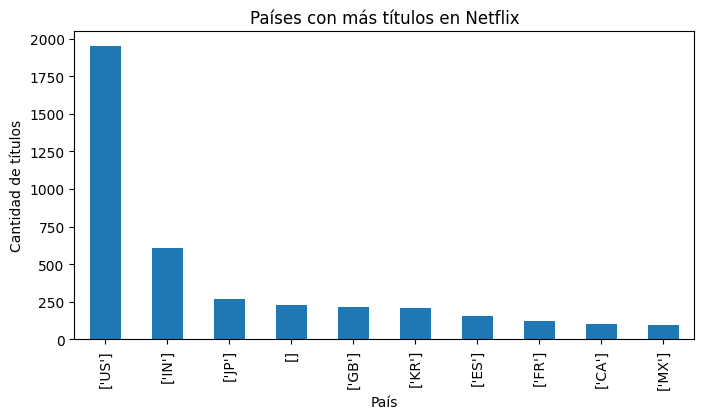

In [26]:
import matplotlib.pyplot as plt

netflix["production_countries"].value_counts().head(10).plot(kind="bar", figsize=(8,4))
plt.title("Países con más títulos en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.show()

### Explicación

- `.plot(kind="bar")` → crea un gráfico de barras.  
- `figsize` → tamaño de la figura.  
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()` → añaden título y etiquetas.  
- `plt.show()` → muestra el gráfico.  
Así visualizamos qué países producen más contenido en Netflix.


# 9) Trabajo evaluable – Análisis de datos con Pandas

En esta unidad realizaremos **dos trabajos prácticos**.  
Este será el **primero** y tendrá un **peso del 40 % sobre la nota de la Unidad de Trabajo 1 (UT)**.

El objetivo es aplicar los conocimientos adquiridos sobre **análisis y manipulación de datos con Pandas**, utilizando un conjunto de datos real de producciones de Netflix.  

Cada bloque de ejercicios tiene un valor parcial dentro de ese 40 %.  
El **Bloque 6** es opcional y permitirá obtener hasta **+5 % adicional**, alcanzando un máximo del **45 % de la nota de la unidad**.

---

## Criterios de evaluación

- Se valorará la **claridad del código**, la **organización del notebook** y la **interpretación de resultados**.  
- Cada bloque debe estar correctamente **comentado** y acompañado de una breve **explicación o conclusión**.  
- No se evaluará solo el resultado, sino la **capacidad de razonamiento y análisis** mostrada en el proceso.

---

## Bloque 1 – Exploración inicial del dataset (10 %)

1. **Carga y exploración básica.**  
   Explica qué información contiene el dataset, cuántas filas y columnas tiene, y qué representa cada una.  
   *(3 %)*  

2. **Tipos de producciones.**  
   Calcula cuántos títulos hay de cada tipo (por ejemplo, películas o series) e interpreta el resultado.  
   *(3 %)*  

3. **Producciones recientes.**  
   Muestra las diez producciones más recientes junto con su país y año de estreno.  
   *(2 %)*  

4. **Producción más antigua.**  
   Indica cuál es la producción más antigua registrada y comenta si el dato parece coherente.  
   *(2 %)*  

---

## Bloque 2 – Filtrado y selección de información (8 %)

5. **Filtro por año.**  
   Muestra las producciones estrenadas en el año 2020 y cuenta cuántas hay.  
   *(2 %)*  

6. **Filtro por director.**  
   Muestra todas las producciones dirigidas por *Steven Spielberg* (si aparece en el dataset).  
   *(2 %)*  

7. **Filtro por palabra clave.**  
   Crea un nuevo DataFrame con los títulos que contengan la palabra *Love* o *Amor*.  
   *(2 %)*  

8. **Filtro por país.**  
   Calcula qué porcentaje del total del catálogo corresponde a producciones de Estados Unidos.  
   *(2 %)*  

---

## Bloque 3 – Análisis descriptivo y agrupaciones (9 %)

9. **Duraciones más largas.**  
   Muestra las cinco producciones con mayor duración e interpreta el resultado.  
   *(3 %)*  

10. **Producción por país.**  
    Identifica los cinco países con más títulos producidos y ordénalos de mayor a menor.  
    *(3 %)*  

11. **Producción por año.**  
    Indica qué año tiene más estrenos y cuántos títulos se publicaron en ese periodo.  
    *(3 %)*  

---

## Bloque 4 – Visualización y análisis avanzado (8 %)

12. **Evolución de estrenos.**  
    Representa mediante un gráfico la evolución del número de títulos a lo largo de los años.  
    *(3 %)*  

13. **Producción por país.**  
    Crea un gráfico de barras con los diez países que más títulos han producido.  
    *(2 %)*  

14. **Décadas.**  
    Añade una nueva columna llamada *“década”* que agrupe los años de estreno (por ejemplo, 1990, 2000, 2010...)  
    y analiza qué década concentra más estrenos.  
    *(2 %)*  

15. **Películas y series por año.**  
    Crea una visualización que compare el número de películas y series por año.  
    *(1 %)*  

---

## Bloque 5 – Análisis temático y síntesis (5 %)

16. **Género terror/horror.**  
    Busca todas las producciones de género *terror* o *horror* y analiza cuál es la más reciente y de qué país procede.  
    *(2 %)*  

17. **Colaboraciones internacionales.**  
    Calcula cuántas producciones fueron realizadas en más de un país.  
    *(1 %)*  

18. **Director más frecuente.**  
    Indica qué director aparece con mayor frecuencia en el conjunto de datos.  
    *(1 %)*  

19. **Géneros predominantes.**  
    Analiza cuáles son los géneros más comunes y en qué tipo de producción predominan.  
    *(1 %)*  

---

## Bloque 6 – Ejercicio de análisis personal (opcional – hasta +5 %)

Este bloque es opcional y permitirá **aumentar hasta +5 % la nota de la unidad** (máximo 45 %).  
Se valorará especialmente la **originalidad**, la **limpieza del código** y la **claridad de las conclusiones**.

20. Realiza un análisis libre a partir del dataset. Puedes elegir cualquier enfoque que te interese.  
   Algunas ideas posibles:  
   - ¿Cuál es el título más largo o más corto del conjunto de datos?  
   - ¿Existen títulos repetidos?  
   - ¿Qué país produce más comedias o dramas?  
   - ¿Hay algún patrón interesante en los años de estreno o en los géneros?  
   - ¿Qué actores o directores aparecen con más frecuencia en determinadas décadas?  

---

### Recomendaciones finales

- Comprueba si existen valores nulos antes de analizar cada columna.  
- Presenta el trabajo en un notebook ordenado, con celdas de texto explicativas y conclusiones breves.  
- Los gráficos deben acompañarse siempre de una interpretación.  
- Cuida la claridad visual y el formato: el documento debe poder leerse como un pequeño informe.

**Importante:**  

Este trabajo representa el **40 % de la nota de la unidad didáctica**, con la posibilidad de alcanzar **hasta el 45 %** gracias al bloque 6 opcional.



In [27]:
"""
EJERCICIO 1
Carga y exploración básica.
Explica qué información contiene el dataset, cuántas filas y columnas tiene, y qué representa cada una.
(3 %)
"""
import pandas as pd

# Cargar el dataset
url = "https://raw.githubusercontent.com/amirtds/kaggle-netflix-tv-shows-and-movies/refs/heads/main/titles.csv"
netflix = pd.read_csv(url)

# Información general
print("El dataset contiene información sobre películas y series disponibles en Netflix.")
print(f"El dataset contiene {netflix.shape[0]} filas y {netflix.shape[1]} columnas,")
print("donde cada fila representa un título del catálogo (una película o serie),")
print("y cada columna describe una característica del mismo.\n")

# Columnas y su significado
print("Las columnas del dataset son:")
print(f"{netflix.columns[0]} (identificador único del título), {netflix.columns[1]} (nombre del título),")
print(f"{netflix.columns[2]} (tipo de contenido), {netflix.columns[3]} (sinopsis), {netflix.columns[4]} (año de estreno),")
print(f"{netflix.columns[5]} (clasificación por edad), {netflix.columns[6]} (duración en minutos), {netflix.columns[7]} (género o géneros),")
print(f"{netflix.columns[8]} (país o países de producción), {netflix.columns[9]} (número de temporadas, solo para series),")
print(f"{netflix.columns[10]}, {netflix.columns[11]}, {netflix.columns[12]} (información proveniente de IMDb),")
print(f"{netflix.columns[13]}, {netflix.columns[14]} (popularidad y puntuación en TMDb).\n")

# Estructura y tipos de datos
print("Información general del DataFrame:")
netflix.info()
print("\nEl dataset tiene 15 columnas, la mayoría de tipo object (texto). Algunas columnas contienen valores nulos (NaN),")
print("especialmente age_certification, seasons, imdb_score e imdb_votes.\n")

# Estadísticas descriptivas
desc = netflix.describe()

# Extraer valores importantes
min_year = int(desc.loc['min', 'release_year'])
max_year = int(desc.loc['max', 'release_year'])
mean_runtime = round(desc.loc['mean', 'runtime'], 0)
mean_seasons = round(desc.loc['mean', 'seasons'], 2)
mean_imdb = round(desc.loc['mean', 'imdb_score'], 2)
mean_tmdb = round(desc.loc['mean', 'tmdb_score'], 2)
mean_popularity = round(desc.loc['mean', 'tmdb_popularity'], 1)
std_popularity = round(desc.loc['std', 'tmdb_popularity'], 1)

# Resumen interpretativo
print(f"Las estadísticas descriptivas muestran que los títulos van desde el año {min_year} hasta {max_year}, "
      f"con una duración media de {mean_runtime} minutos. "
      f"El número de temporadas promedio es de {mean_seasons}, "
      f"y las puntuaciones medias en IMDb y TMDb son {mean_imdb} y {mean_tmdb}, respectivamente. "
      f"La popularidad en TMDb tiene una media de {mean_popularity}, "
      f"aunque con una gran dispersión (desviación estándar ≈ {std_popularity}), "
      f"lo que indica que algunos títulos son mucho más populares que otros.")


El dataset contiene información sobre películas y series disponibles en Netflix.
El dataset contiene 5806 filas y 15 columnas,
donde cada fila representa un título del catálogo (una película o serie),
y cada columna describe una característica del mismo.

Las columnas del dataset son:
id (identificador único del título), title (nombre del título),
type (tipo de contenido), description (sinopsis), release_year (año de estreno),
age_certification (clasificación por edad), runtime (duración en minutos), genres (género o géneros),
production_countries (país o países de producción), seasons (número de temporadas, solo para series),
imdb_id, imdb_score, imdb_votes (información proveniente de IMDb),
tmdb_popularity, tmdb_score (popularidad y puntuación en TMDb).

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                -------------

In [47]:
"""
EJERCICIO 2
Tipos de producciones.
Calcula cuántos títulos hay de cada tipo (por ejemplo, películas o series) e interpreta el resultado.
"""
# Contamos cuántas películas y series hay en el dataset
movies = netflix["type"].value_counts().iloc[0]
shows = netflix["type"].value_counts().iloc[1]
total = len(netflix)

# Mostramos un resumen general
print(f"El resultado nos muestra que hay {movies} peliculas y {shows} series, de los {total} registros que tiene el dataset.")

# Mostramos la cuenta total por tipo (pelicula o serie)
netflix["type"].value_counts()

El resultado nos muestra que hay 3759 peliculas y 2047 series, de los 5806 registros que tiene el dataset.


,count
type,
MOVIE,3759
SHOW,2047


In [29]:
"""
EJERCICIO 3
Producciones recientes.
Muestra las diez producciones más recientes junto con su país y año de estreno.
"""
# Mostramos las 10 producciones más recientes con su país y año
netflix[['title', 'production_countries', 'release_year']].sort_values("release_year", ascending=False).head(10)


,title,production_countries,release_year
4831,Anatomy of a Scandal,"['GB', 'US']",2022
4832,Heartstopper,['GB'],2022
4833,The Pentaverate,['US'],2022
4834,Our Great National Parks,['US'],2022
4835,Inventing Anna,['US'],2022
5765,Barbie: It Takes Two,['US'],2022
4851,Bad Vegan: Fame. Fraud. Fugitives.,['US'],2022
4850,Hold Tight,['PL'],2022
4848,Windfall,['US'],2022
4846,Vikings: Valhalla,['US'],2022


In [30]:
"""
EJERCICIO 4
Producción más antigua.
Indica cuál es la producción más antigua registrada y comenta si el dato parece coherente.
"""
print("El dataset contiene datos incompletos o inconsistentes, lo cual es normal al tratarse de un dato con una fecha de salida tan antigua.")

# Identificamos la producción más antigua registrada
netflix.sort_values("release_year", ascending=True).head(1)

El dataset contiene datos incompletos o inconsistentes, lo cual es normal al tratarse de un dato con una fecha de salida tan antigua.


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.6,NaN


In [31]:
"""
EJERCICIO 5
Filtro por año.
Muestra las producciones estrenadas en el año 2020 y cuenta cuántas hay.
"""
# Filtramos las producciones estrenadas en el año 2020
number_productions_2020 = len(netflix.loc[netflix["release_year"] == 2020])
print(f"El número de producciones estrenadas en 2020 es: {number_productions_2020}")

# Mostramos las producciones de ese año
netflix.loc[netflix["release_year"] == 2020]

El número de producciones estrenadas en 2020 es: 805


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3180,ts216679,Bridgerton,SHOW,"Wealth, lust, and betrayal set in the backdrop...",2020,TV-MA,62,"['drama', 'romance']",['US'],4.0,tt8740790,7.3,122036.0,206.258,8.2
3187,tm681578,The Rental,MOVIE,Two couples rent a vacation home for what shou...,2020,R,88,"['thriller', 'drama', 'horror']",['US'],NaN,tt10003008,5.7,29201.0,41.428,5.6
3189,ts87453,Space Force,SHOW,A four-star general begrudgingly teams up with...,2020,TV-MA,30,['comedy'],['US'],2.0,tt9612516,6.7,61739.0,30.856,6.6
3191,tm832345,365 Days,MOVIE,Massimo is a member of the Sicilian Mafia fami...,2020,NaN,114,"['romance', 'drama', 'european']",['PL'],NaN,tt10886166,3.3,80198.0,112.545,7.0
3192,ts89259,The Queen's Gambit,SHOW,"In a Kentucky orphanage in the 1950s, a young ...",2020,TV-MA,56,"['drama', 'sport']",['US'],1.0,tt10048342,8.6,406350.0,104.215,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,tm915354,Girl's Revenge,MOVIE,"At a birthday party, a sex video is filmed wit...",2020,NaN,81,['drama'],['TW'],NaN,tt13388018,5.7,190.0,3.153,5.1
4823,tm921230,Story of Kale: When Someone's in Love,MOVIE,"After leaving a toxic relationship, Dinda emba...",2020,NaN,77,"['drama', 'romance']",['ID'],NaN,tt13081264,6.4,270.0,3.615,7.0
4827,tm840236,Milea,MOVIE,"Years after his teen romance with Milea, a now...",2020,NaN,99,"['romance', 'drama']",['ID'],NaN,tt11127878,6.4,547.0,2.213,5.7
4829,ts224956,What the Love! with Karan Johar,SHOW,With help from celebrity guests and a glam squ...,2020,NaN,47,['reality'],['IO'],1.0,NaN,NaN,NaN,1.617,7.0


In [32]:
"""
EJERCICIO 6
Filtro por director.
Muestra todas las producciones dirigidas por Steven Spielberg (si aparece en el dataset).
"""
print("En las columnas del dataset no aparece nada sobre director ni nada parecido, por lo que no se puede hacer la búsqueda del director Steven Spielberg, aunque si existiera, sería así: netflix.loc[netflix['director'] == 'Steven Spielberg']")


En las columnas del dataset no aparece nada sobre director ni nada parecido, por lo que no se puede hacer la búsqueda del director Steven Spielberg, aunque si existiera, sería así: netflix.loc[netflix['director'] == 'Steven Spielberg']


In [33]:
"""
EJERCICIO 7
Filtro por palabra clave.
Crea un nuevo DataFrame con los títulos que contengan la palabra Love o Amor.
"""
# Creamos el DataFrame con los titulos que contienen "Love" o "Amor" (sin distinguiir mayusculas)
love_dataframe = netflix[netflix['title'].str.contains('Love', case=False, na=False) | netflix['title'].str.contains('Amor', case=False, na=False)]
len(love_dataframe)


148

In [48]:
"""
EJERCICIO 8
Filtro por país.
Calcula qué porcentaje del total del catálogo corresponde a producciones de Estados Unidos.
"""
us_productions = len(netflix[netflix['production_countries'].str.contains("'US'", na=False)])
total_productions = len(netflix)
percentage = round((us_productions / total_productions) * 100, 2)
print(f"El porcentaje de producciones de Estados Unidos es: {percentage}%")


El porcentaje de producciones de Estados Unidos es: 40.08%


In [35]:
"""
EJERCICIO 9
Duraciones más largas.
Muestra las cinco producciones con mayor duración e interpreta el resultado.
"""
netflix.sort_values("runtime", ascending=False).head(5)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
34,tm188894,The School of Mischief,MOVIE,This play is about a female teacher and how sh...,1973,NaN,251,['comedy'],['EG'],NaN,NaN,NaN,NaN,3.381,8.5
1000,tm469911,Bonnie & Clyde,MOVIE,"Based on the true story of Clyde Barrow, a cha...",2013,PG-13,240,"['drama', 'crime', 'european']",['AT'],NaN,tt2374851,NaN,NaN,0.933,7.5
25,tm76557,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,NaN,235,"['comedy', 'drama']",['EG'],NaN,tt8312792,9.0,943.0,2.733,7.7
32,tm97793,Lock Your Girls In,MOVIE,Dr. Raafat faces challenges and difficulties i...,1980,NaN,230,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.313,8.0
49,tm180542,Once Upon a Time in America,MOVIE,A former Prohibition-era Jewish gangster retur...,1984,R,229,"['drama', 'crime', 'european']","['US', 'IT']",NaN,tt0087843,8.3,342335.0,21.322,8.4


In [50]:
"""
EJERCICIO 10
Producción por país.
Identifica los cinco países con más títulos producidos y ordénalos de mayor a menor.
"""
#netflix.groupby("production_countries")["title"].count().sort_values(ascending=False).head(5)

import ast

# Quitamos los valores nulos y convertimos la cadena que almacena los países '[]' en lista de python []
df_countries = netflix.dropna(subset=['production_countries'])
# Asegurarnos de que no hay strings vacías que den error
df_countries = df_countries[df_countries['production_countries'] != '[]']

# 2. Usamos ast.literal_eval (que lee un texto que parece una lista y la convierte a la lista real de python)
df_countries['country_list'] = df_countries['production_countries'].apply(ast.literal_eval)

# 3. Usamos explode (que es una función de pandas, coge una columna donde hay listas y crea una fila nueva por cada elemento dentor de esas listas.)
df_exploded_countries = df_countries.explode('country_list')
top_paises = df_exploded_countries['country_list'].value_counts()

print("Top 5 países por producción (incluyendo coproducciones):")
top_paises.head(5)

Top 5 países por producción (incluyendo coproducciones):


,count
country_list,
US,2327
IN,629
GB,406
JP,291
FR,248


In [37]:
"""
EJERCICIO 11
Producción por año.
Indica qué año tiene más estrenos y cuántos títulos se publicaron en ese periodo.
"""
netflix.groupby("release_year")["title"].count().sort_values(ascending=False).head(1)

,title
release_year,
2019,848


Hay un incremento notable a partir de la década de los 2000, pero se dispara de 2010 en adelante, teniendo un pico de incremento.


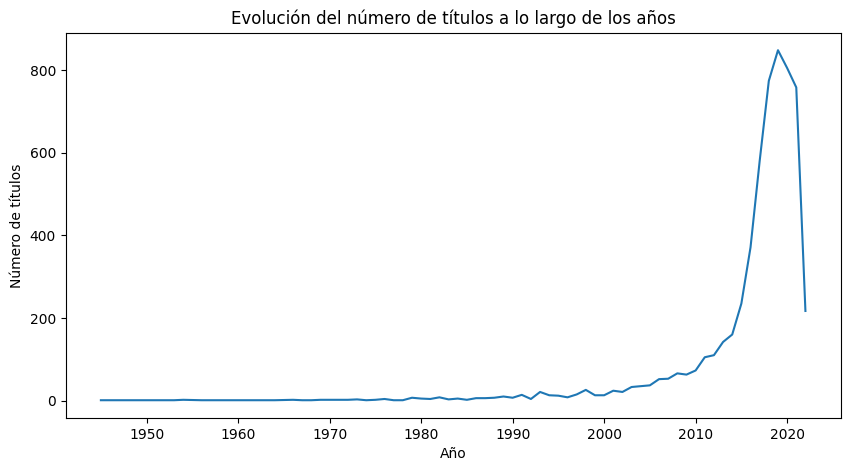

In [51]:
"""
EJERCICIO 12
Evolución de estrenos.
Representa mediante un gráfico la evolución del número de títulos a lo largo de los años.
"""
import matplotlib.pyplot as plt

print("Hay un incremento notable a partir de la década de los 2000, pero se dispara de 2010 en adelante, teniendo un pico de incremento.")

netflix.groupby("release_year")["title"].count().plot(kind="line", figsize=(10,5))
plt.title("Evolución del número de títulos a lo largo de los años")
plt.xlabel("Año")
plt.ylabel("Número de títulos")
plt.show()

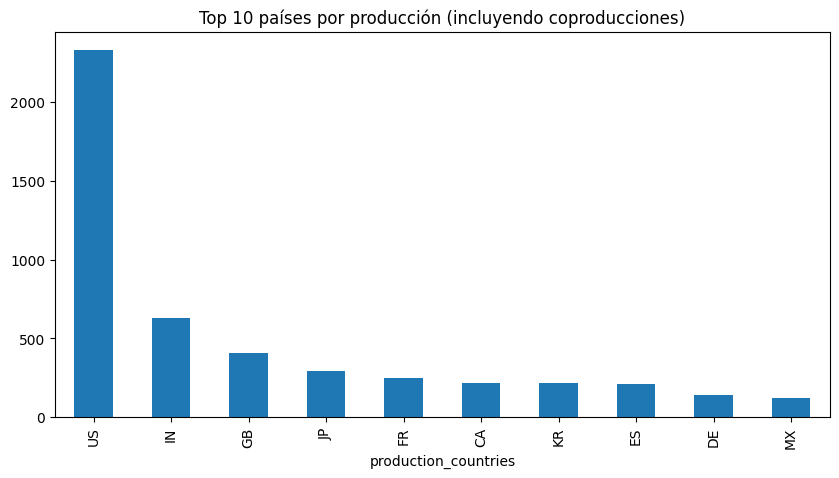

In [54]:
"""
EJERCICIO 13
Producción por país.
Crea un gráfico de barras con los diez países que más títulos han producido.
"""
paises_list = netflix['production_countries'].apply(ast.literal_eval)
paises_exploded = paises_list.explode()
top_10_paises = paises_exploded.value_counts().head(10)
top_10_paises.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 países por producción (incluyendo coproducciones)")
plt.show()

In [40]:
"""
EJERCICIO 14
Añade una nueva columna llamada “década” que agrupe los años de estreno (por ejemplo, 1990, 2000, 2010...)
y analiza qué década concentra más estrenos.
"""
# Creamos la nueva columna
netflix["decade"] = netflix["release_year"] // 10 * 10
print("La decada con más estrenos es 2010")

# Contamos los titulos estrenados por cada década
netflix["decade"].value_counts().sort_index()

La decada con más estrenos es 2010


,count
decade,
1940,1
1950,6
1960,11
1970,23
1980,56
1990,133
2000,397
2010,3399
2020,1780


Podemos ver la evolución que a partir de la década de 2010, el aumento del número de producciones ha crecido muchísimo en comparación con las 'estimaciones'.


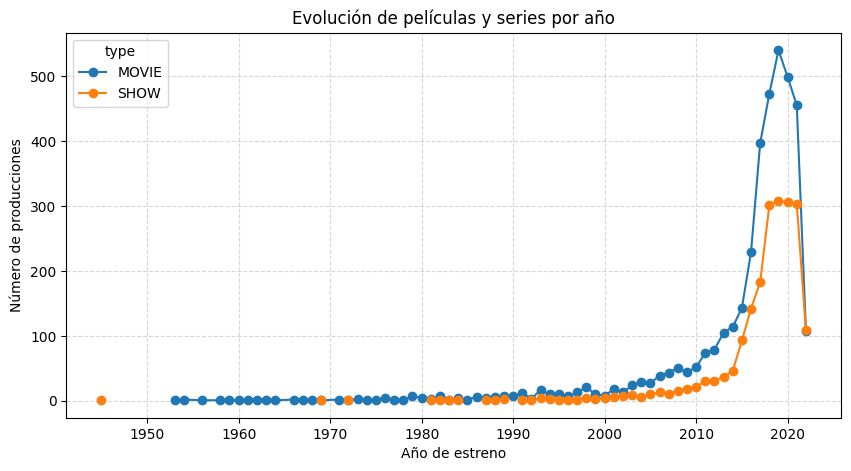

In [41]:
"""
EJERCICIO 15
Películas y series por año.
Crea una visualización que compare el número de películas y series por año.
"""
print("Podemos ver la evolución que a partir de la década de 2010, el aumento del número de producciones ha crecido muchísimo en comparación con las 'estimaciones' y que las películas se imponen ante las series.")
# Mostramos el gráfico del número de películas y series por año
netflix.groupby(["release_year", "type"]).size().unstack().plot(
    kind="line", figsize=(10, 5), marker='o'
)
plt.title("Evolución de películas y series por año")
plt.xlabel("Año de estreno")
plt.ylabel("Número de producciones")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [42]:
"""
EJERCICIO 16
Género terror/horror.
Busca todas las producciones de género terror o horror y analiza cuál es la más reciente y de qué país procede.
"""
print("El género terror no existe en el DataFrame")
# Buscamos las producciones que contengan horror o terror en el DataFrame
horror_and_terror_productions = netflix[netflix["genres"].str.contains("horror|terror", case=False, na=False)]
# Mostramos la más reciente junto a su país
recent=horror_and_terror_productions.sort_values("release_year",ascending=False).head(1)
print(f"La producción más reciente es: {recent.iloc[0]["title"]} y procede de: {recent.iloc[0]["production_countries"]}")

El género terror no existe en el DataFrame
La producción más reciente es: The Wasteland y procede de: ['ES']


In [43]:
"""
EJERCICIO 17
Colaboraciones internacionales.
Calcula cuántas producciones fueron realizadas en más de un país.
"""

multi_country = netflix["production_countries"].str.contains(",", regex=False).sum()
print(f"Producciones realizadas en más de un país: {multi_country}")


Producciones realizadas en más de un país: 642


In [44]:
"""
EJERCICIO 18
Director más frecuente.
Indica qué director aparece con mayor frecuencia en el conjunto de datos.
"""
print("Pasa algo similar al ejercicio 6, no existe ninguna columna director, por lo que no podemos saber el director que más aparece en el conjunto de datos.")
print("De todas formas, el comando correcto sería: netflix['director'].value_counts().head(1)")

Pasa algo similar al ejercicio 6, no existe ninguna columna director, por lo que no podemos saber el director que más aparece en el conjunto de datos.
De todas formas, el comando correcto sería: netflix[netflix['director'].value_counts().head(1)]


In [45]:
"""
EJERCICIO 19
Géneros predominantes.
Analiza cuáles son los géneros más comunes y en qué tipo de producción predominan.
"""
import ast

# Convertimos la columna que contiene strings con formato de lista en listas reales de python importando ast y usando el método de literal_eval
netflix["genres"] = netflix["genres"].apply(ast.literal_eval)

# "Explode" convierte cada lista de géneros en una fila individual
netflix_exploded = netflix.explode("genres")
# Contamos cuántas producciones hay por género y tipo (película o serie)
common_genres = netflix_exploded.groupby(["genres", "type"]).size()
# Mostramos los géneros más comunes
print(common_genres.sort_values(ascending=False))




genres         type 
drama          MOVIE    1864
comedy         MOVIE    1543
drama          SHOW     1037
thriller       MOVIE     830
comedy         SHOW      726
romance        MOVIE     694
action         MOVIE     641
documentation  MOVIE     590
crime          MOVIE     524
action         SHOW      412
animation      SHOW      394
scifi          SHOW      377
crime          SHOW      367
european       MOVIE     357
thriller       SHOW      348
family         MOVIE     329
fantasy        MOVIE     321
documentation  SHOW      320
fantasy        SHOW      310
family         SHOW      293
animation      MOVIE     271
horror         MOVIE     267
romance        SHOW      264
reality        SHOW      214
scifi          MOVIE     210
music          MOVIE     172
history        MOVIE     137
horror         SHOW      113
sport          MOVIE     111
european       SHOW      103
history        SHOW       96
war            MOVIE      94
music          SHOW       66
sport          SHOW   

Realiza un análisis libre a partir del dataset. Puedes elegir cualquier enfoque que te interese.
Algunas ideas posibles:

* **¿Cuál es el título más largo o más corto del conjunto de datos?** El título más largo corresponde con: Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton y el más corto con: H

* **¿Existen títulos repetidos?**
Sí existen varios titulos que aparecen más de una vez, como Connected que aparece 3 veces, The Gift que aparece 3 veces y Redemption que aparece 2 veces. Aunque hay un total de 52 títulos repetidos.

* **¿Qué país produce más comedias o dramas?**
Estados Unidos lidera tanto en comedias (938) como en dramas (897)

* **¿Hay algún patrón interesante en los años de estreno o en los géneros?**
Los resultados los hemos visto en anteriores ejercicios (12 y 19) que el incremento a partir de la década de 2010 es bastante mayor la curva del que se esperaba, creandose muchísimas producciones que hacen que el incremento no sea exponencial.

* **¿Qué actores o directores aparecen con más frecuencia en determinadas décadas?**
El DataSet no contiene información de 'cast' ni de 'director' por lo que no podemos saber la información en esta pregunta.



### Fin del Notebook
